In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('accidents.csv')

In [3]:
df.head()

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding


In [4]:
df.tail(10)

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
49990,10-10-2004,Night,Louisiana,Foggy,Fine,3,Reckless Driving
49991,22-03-2007,Evening,West Virginia,Foggy,Rough,8,Driver Fatigue
49992,07-06-2014,Evening,Iowa,Rainy,Rough,2,Road Conditions
49993,29-09-2015,Afternoon,Georgia,Foggy,Fine,9,Driver Fatigue
49994,27-04-2020,Night,Pennsylvania,Foggy,Fine,2,Speeding
49995,20-08-2002,Night,Virginia,Clear,Under Construction,2,Mechanical Failure
49996,15-05-2012,Night,Virginia,Clear,Under Construction,0,Mechanical Failure
49997,19-05-2007,Evening,North Carolina,Rainy,Under Construction,2,Driver Fatigue
49998,04-08-2019,Night,South Carolina,Clear,Fine,0,Distracted Driving
49999,25-04-2019,Evening,Georgia,Rainy,Fine,2,Weather Conditions


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   AccidentDate      50000 non-null  object
 1   Timing            50000 non-null  object
 2   State             50000 non-null  object
 3   WeatherCondition  50000 non-null  object
 4   RoadCondition     50000 non-null  object
 5   Deaths            50000 non-null  int64 
 6   Reason            50000 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.7+ MB


In [6]:
df.describe()

,Deaths
count,50000.000000
mean,4.983040
std,3.160581
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


In [7]:
df.isnull().sum()

,0
AccidentDate,0
Timing,0
State,0
WeatherCondition,0
RoadCondition,0
Deaths,0
Reason,0


In [8]:
df.duplicated().sum()
df

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding
...,...,...,...,...,...,...,...
49995,20-08-2002,Night,Virginia,Clear,Under Construction,2,Mechanical Failure
49996,15-05-2012,Night,Virginia,Clear,Under Construction,0,Mechanical Failure
49997,19-05-2007,Evening,North Carolina,Rainy,Under Construction,2,Driver Fatigue
49998,04-08-2019,Night,South Carolina,Clear,Fine,0,Distracted Driving


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['AccidentDate', 'Timing', 'State', 'WeatherCondition', 'RoadCondition',
       'Deaths', 'Reason'],
      dtype='object')

#Exploratory Data Analysis
df['Deaths'].value_counts()

In [12]:
df['Deaths'].value_counts()

,count
Deaths,
3,4611
1,4591
2,4571
7,4563
6,4561
0,4555
10,4541
5,4541
8,4539


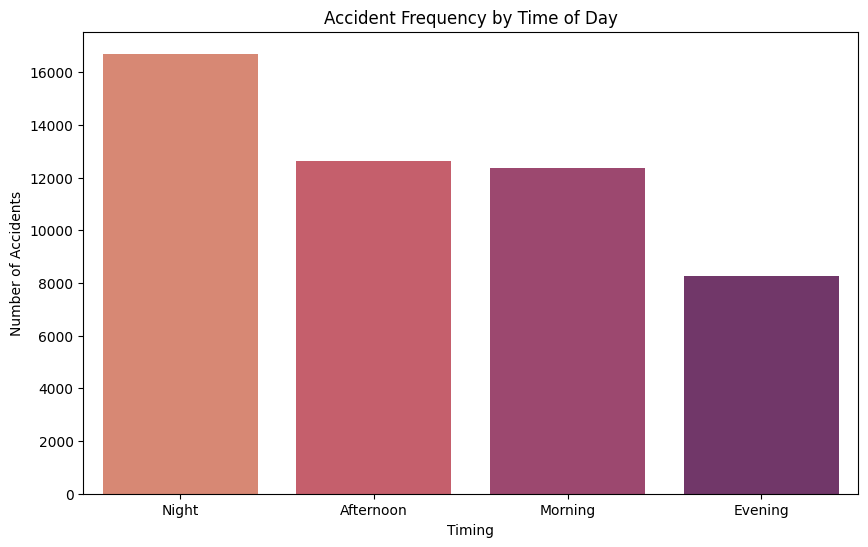

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Timing', palette='flare', order=df['Timing'].value_counts().index)
plt.title('Accident Frequency by Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

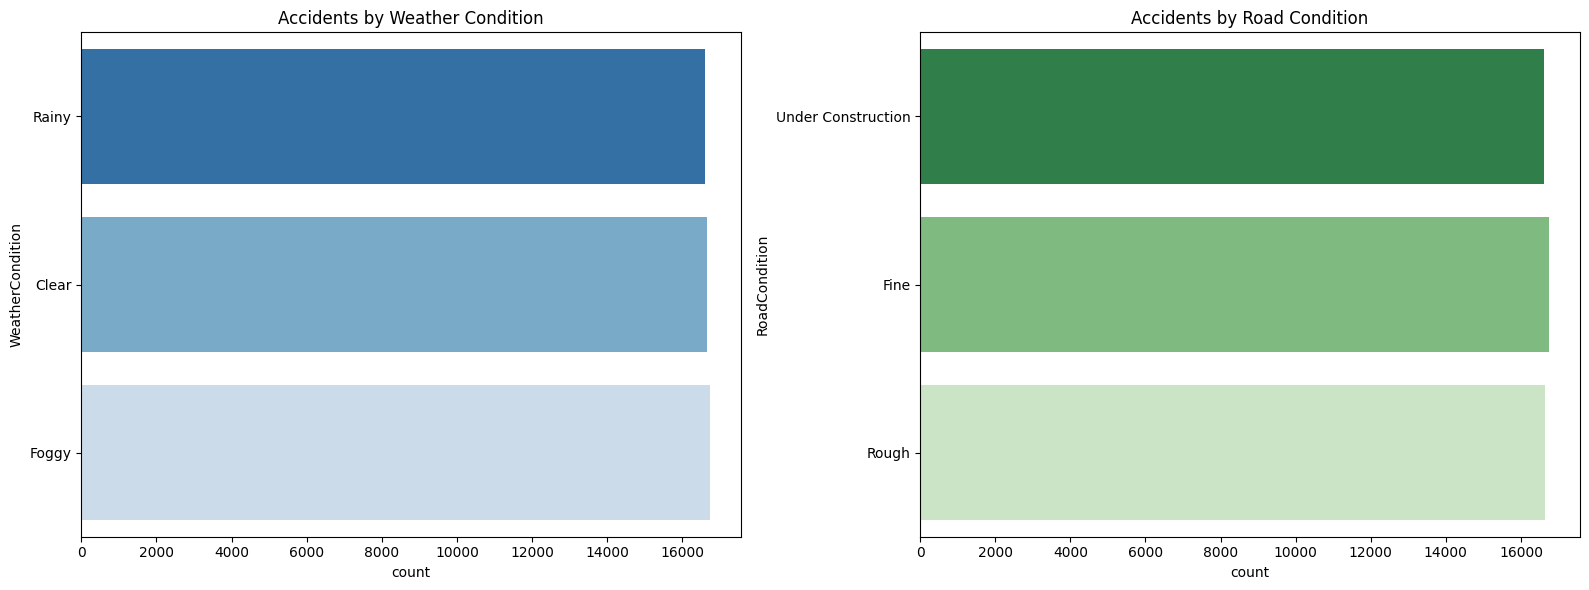

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Weather Conditions
sns.countplot(ax=axes[0], data=df, y='WeatherCondition', palette='Blues_r')
axes[0].set_title('Accidents by Weather Condition')
# Road Conditions
sns.countplot(ax=axes[1], data=df, y='RoadCondition', palette='Greens_r')
axes[1].set_title('Accidents by Road Condition')
plt.tight_layout()
plt.show()

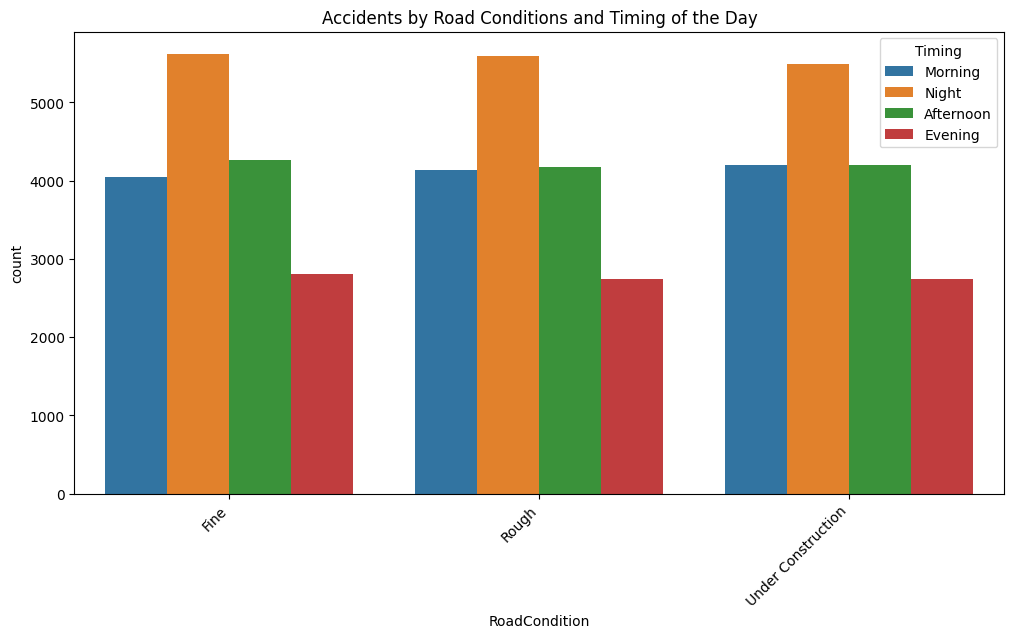

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="RoadCondition", hue="Timing", order=df['RoadCondition'].value_counts().index)
plt.title("Accidents by Road Conditions and Timing of the Day")
plt.xticks(rotation=45, ha="right")
plt.show()

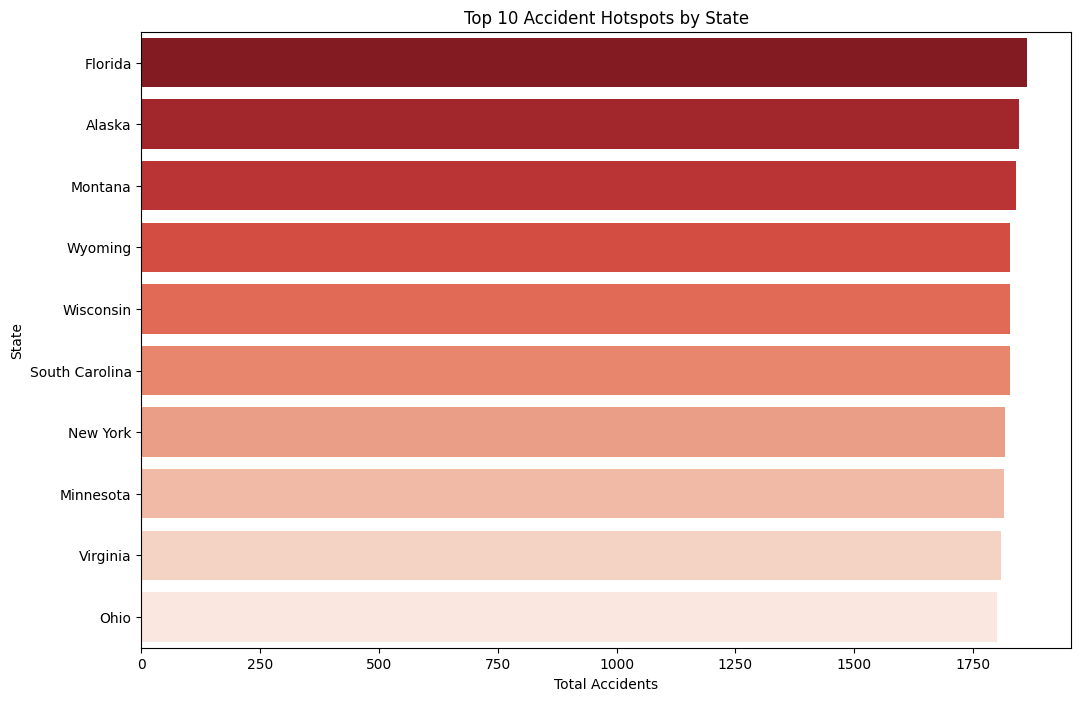

In [16]:
plt.figure(figsize=(12, 8))
state_accidents = df['State'].value_counts().head(10) # Top 10 States
sns.barplot(x=state_accidents.values, y=state_accidents.index, palette='Reds_r')
plt.title('Top 10 Accident Hotspots by State')
plt.xlabel('Total Accidents')
plt.show()

Text(0.5, 0, 'Reason')

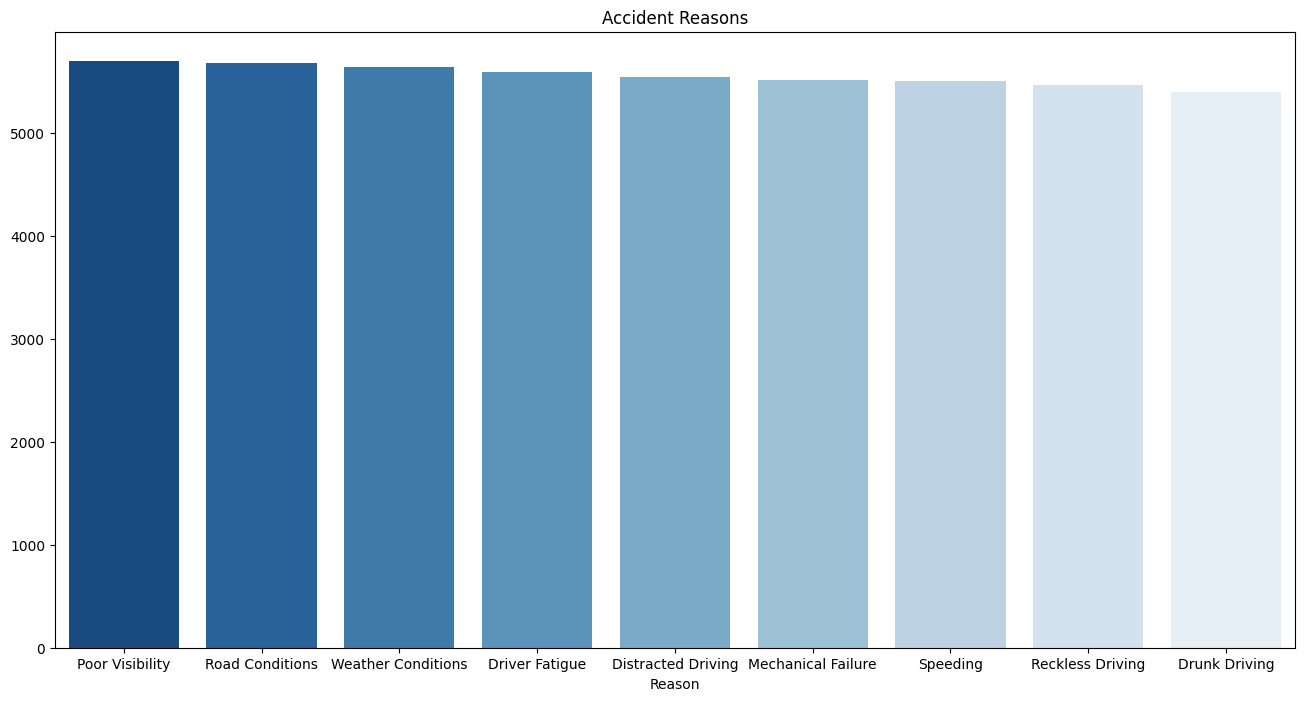

In [17]:
plt.figure(figsize=(16, 8))
reason_counts = df['Reason'].value_counts()
sns.barplot(x=reason_counts.index, y=reason_counts.values, palette='Blues_r')
plt.title('Accident Reasons')
plt.xlabel('Reason')

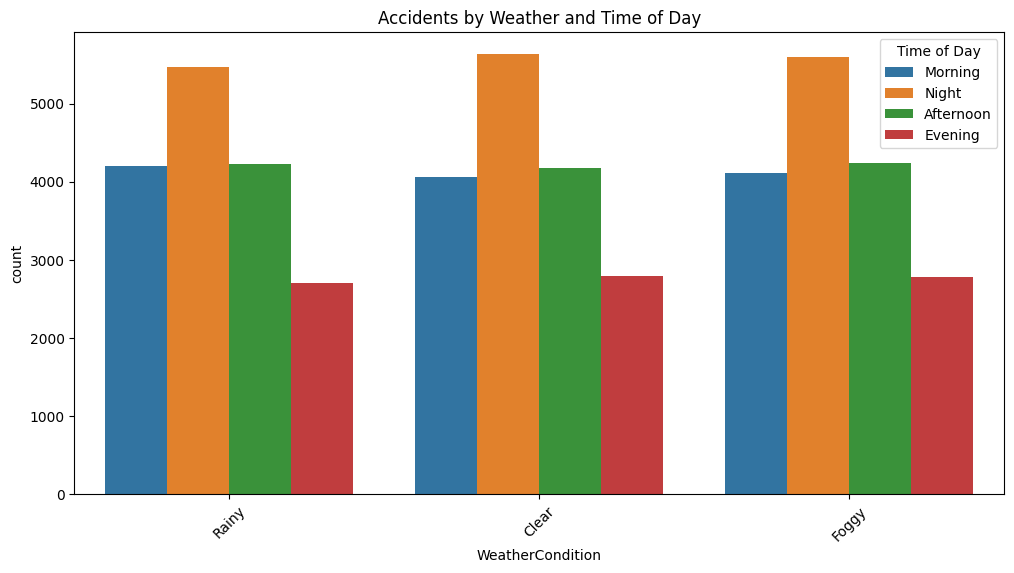

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="WeatherCondition", hue="Timing", data=df)
plt.title("Accidents by Weather and Time of Day")
plt.xticks(rotation=45)
plt.legend(title="Time of Day")
plt.show()

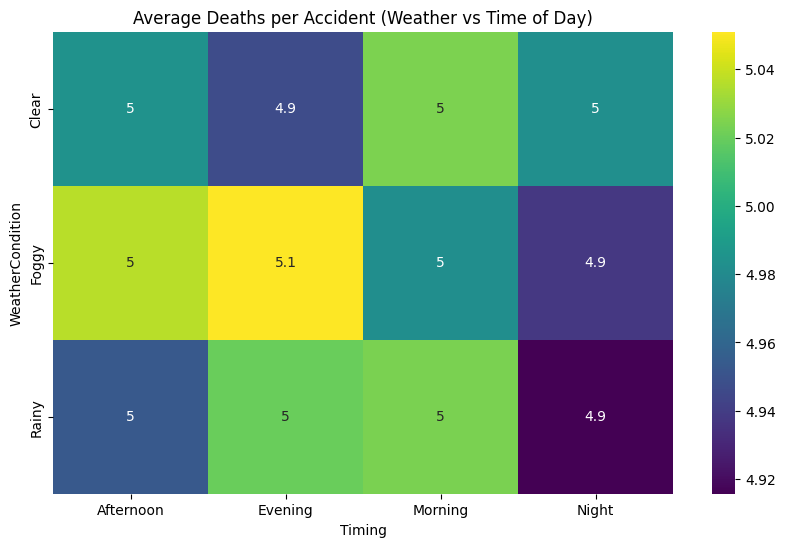

In [19]:
severity_matrix = df.pivot_table(
    values="Deaths",
    index="WeatherCondition",
    columns="Timing",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
sns.heatmap(severity_matrix, annot=True, cmap="viridis")
plt.title("Average Deaths per Accident (Weather vs Time of Day)")
plt.show()


<Figure size 4000x800 with 0 Axes>

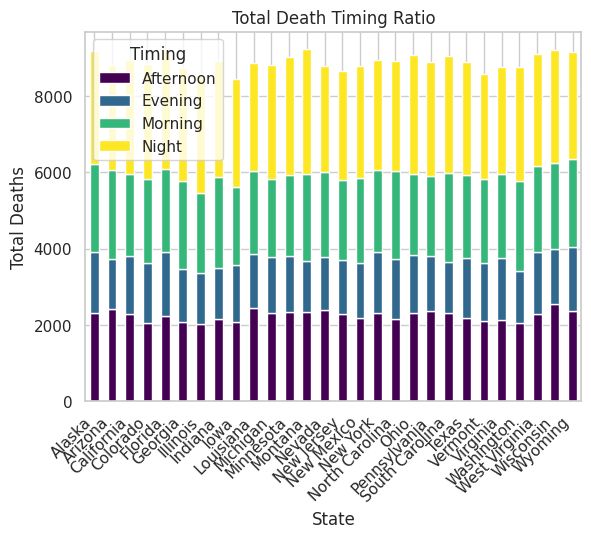

In [20]:
sns.set(style="whitegrid")

# Group the data by state and timing, and calculate the total number of deaths
state_timing_deaths = df.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

# Pivot the table to get a format suitable for plotting
state_timing_deaths_pivot = state_timing_deaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

# Create a bar plot for state-wise total death timing ratio
plt.figure(figsize=(40, 8))
state_timing_deaths_pivot.plot(kind='bar', stacked=True, colormap="viridis")
plt.title("Total Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Timing")
plt.show()

In [21]:
le = LabelEncoder()
for col in ['Timing', 'State', 'WeatherCondition', 'RoadCondition']:
    df[col] = le.fit_transform(df[col])

# Defining Features (X) and Target (y)
# Let's predict 'Reason' based on environment and time
X = df[['Timing', 'State', 'WeatherCondition', 'RoadCondition']]
y = le.fit_transform(df['Reason'])

In [22]:
# 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 39999
Testing samples: 10000


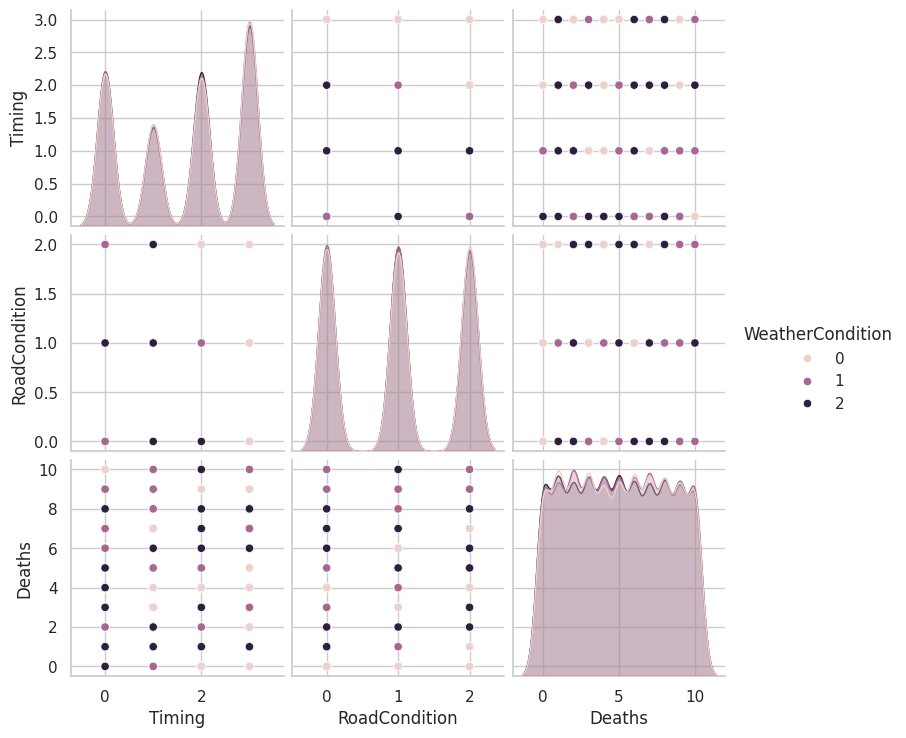

In [23]:
#  pairplot
sns.pairplot(df[['Timing', 'WeatherCondition', 'RoadCondition', 'Deaths']], hue='WeatherCondition')
plt.show()

In [24]:
# Initialize KNN with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [25]:
y_pred = knn.predict(X_test)

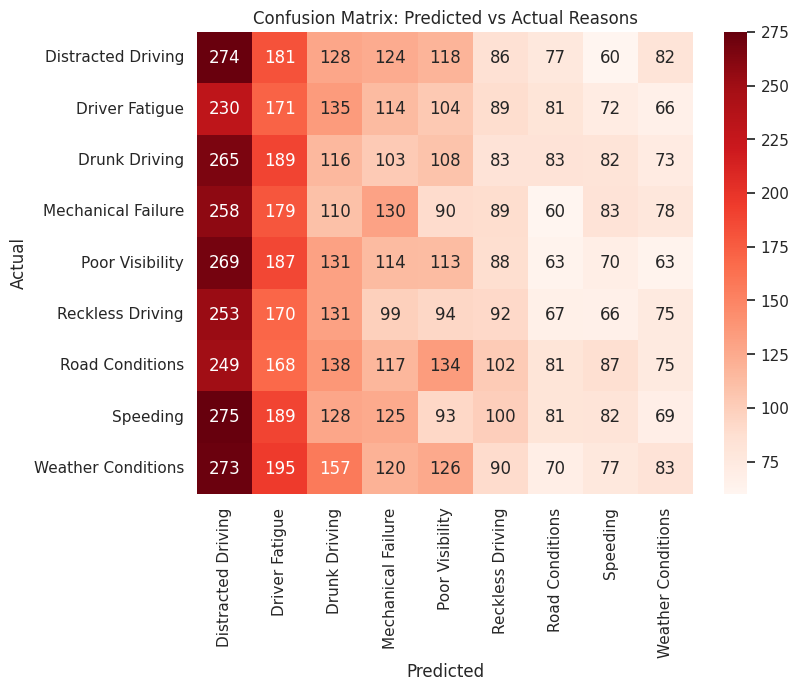

In [26]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix: Predicted vs Actual Reasons')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
class_report = classification_report(y_test, y_pred, target_names=le.classes_)
print(class_report)

                    precision    recall  f1-score   support

Distracted Driving       0.12      0.24      0.16      1130
    Driver Fatigue       0.10      0.16      0.13      1062
     Drunk Driving       0.10      0.11      0.10      1102
Mechanical Failure       0.12      0.12      0.12      1077
   Poor Visibility       0.12      0.10      0.11      1098
  Reckless Driving       0.11      0.09      0.10      1047
   Road Conditions       0.12      0.07      0.09      1151
          Speeding       0.12      0.07      0.09      1142
Weather Conditions       0.12      0.07      0.09      1191

          accuracy                           0.11     10000
         macro avg       0.12      0.11      0.11     10000
      weighted avg       0.12      0.11      0.11     10000



In [28]:
accuracy_score(y_test, y_pred)


0.1142